In [1]:
!git clone https://github.com/META-MINSU-LEE/Projects

Cloning into 'Projects'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 92 (delta 4), reused 0 (delta 0), pack-reused 66
Receiving objects: 100% (92/92), 497.45 KiB | 2.55 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


# MEPFIL USP1 데이터를 불러옵니다.
df = pd.read_csv('./Projects/DATA/MEPFILDUSP1.csv')

# 데이터 값을 살펴보겠습니다.
df


,NO,Straight,EP Avg,EP SD,EP Min,EP Max,Diameter,2W,4W Avg,4W SD,4W Min,4W Max
0,1,12.36,6.73,0.31,6.33,7.19,0.543,5.41,5.05,0.62,4.51,6.03
1,2,12.16,6.43,0.19,6.15,6.67,0.542,5.24,5.06,0.28,4.57,5.26
2,3,12.01,6.55,0.22,6.28,6.84,0.541,6.23,5.20,0.14,4.97,5.32
3,4,12.05,6.47,0.15,6.26,6.63,0.544,6.23,5.37,0.15,5.22,5.55
4,5,12.78,6.39,0.25,6.08,6.76,0.542,5.85,4.96,0.29,4.51,5.24
...,...,...,...,...,...,...,...,...,...,...,...,...
451,452,12.04,7.03,0.11,6.86,7.16,0.541,6.11,5.60,0.43,4.94,5.94
452,453,11.94,6.74,0.38,6.11,7.13,0.541,6.23,5.52,0.20,5.31,5.80
453,454,11.90,6.87,0.21,6.61,7.14,0.538,6.50,5.40,0.70,4.87,6.58
454,455,11.59,6.75,0.35,6.29,7.23,0.539,5.91,5.51,0.73,4.61,6.50


In [3]:
# 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다.
df.dtypes

NO            int64
Straight    float64
EP Avg      float64
EP SD       float64
EP Min      float64
EP Max      float64
Diameter    float64
2W          float64
4W Avg      float64
4W SD       float64
4W Min      float64
4W Max      float64
dtype: object

In [4]:
# 속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(12)

NO          0
Straight    0
EP Avg      0
EP SD       0
EP Min      0
EP Max      0
Diameter    0
2W          0
4W Avg      0
4W SD       0
4W Min      0
4W Max      0
dtype: int64

In [5]:
# 데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

# 4W와 관련이 큰 것부터 순서대로 저장합니다.
df_corr_sort=df_corr.sort_values('4W Avg', ascending=False)

# 4W와 관련도가 가장 큰 10개의 속성들을 출력합니다.
df_corr_sort['4W Avg'].head(12)

4W Avg      1.000000
4W Max      0.874743
4W Min      0.861210
Straight    0.199038
2W          0.196032
NO          0.163223
EP Avg      0.130781
EP Min      0.108250
Diameter    0.012897
EP SD       0.003578
EP Max     -0.002811
4W SD      -0.047462
Name: 4W Avg, dtype: float64

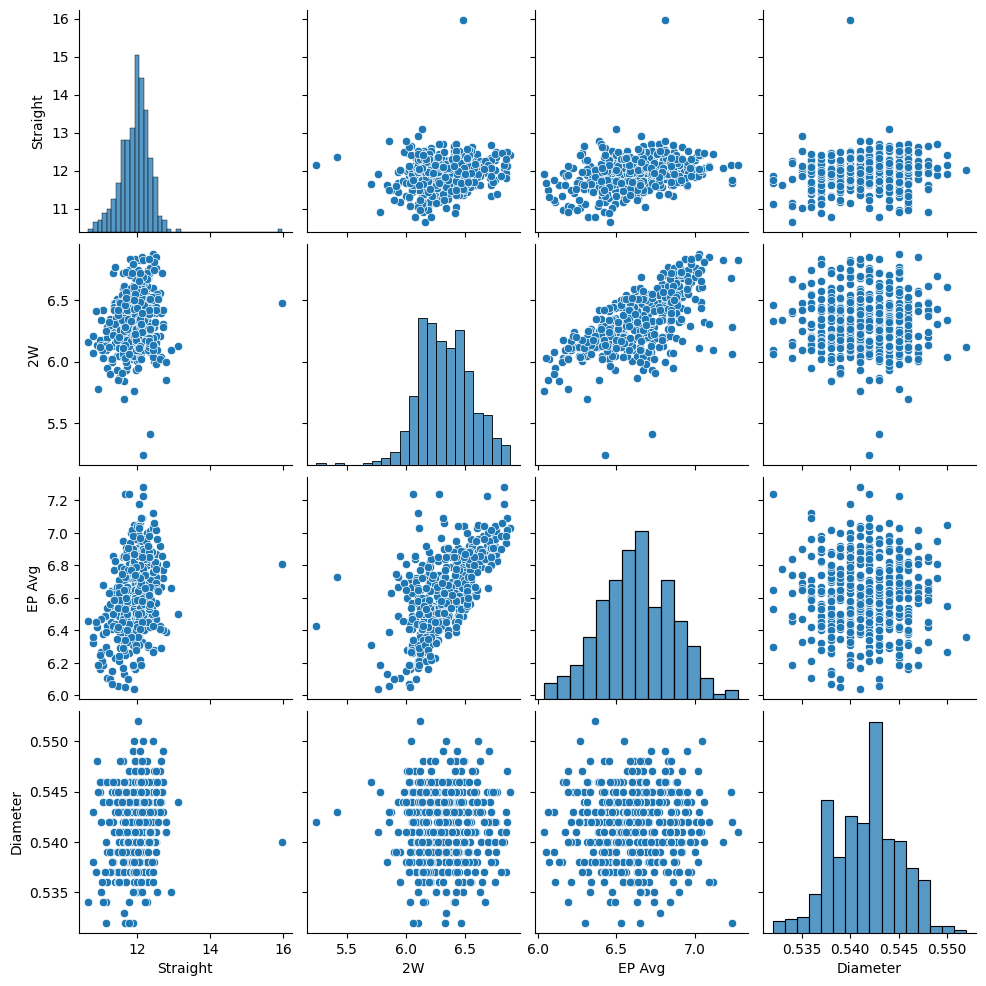

In [6]:
# 4W와 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['Straight','2W','EP Avg','Diameter']
sns.pairplot(df[cols])
plt.show();

In [7]:
# 4W 값을 제외한 나머지 열을 저장합니다.
cols_train=['Straight','2W','EP Avg','Diameter']
X_train_pre = df[cols_train]

# 4W 값을 저장합니다.
y = df['4W Avg'].values

In [8]:
# 전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [9]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

# 모델의 이름을 정합니다.
modelpath="./data/model/TEST.TEST2"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1661 (6.49 KB)
Trainable params: 1661 (6.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
9/9 [==============================] - 4s 116ms/step - loss: 35.1854 - val_loss: 32.0996
Epoch 2/2000
9/9 [==============================] - 1s

In [10]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_4WAvg = []
pred_4WAvg = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제4W Avg: {:.2f}, 예상4W Avg: {:.2f}".format(real, prediction))
    real_4WAvg.append(real)
    pred_4WAvg.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

3/3 [==============================] - 0s 2ms/step
실제4W Avg: 5.58, 예상4W Avg: 5.27
실제4W Avg: 5.47, 예상4W Avg: 5.18
실제4W Avg: 5.51, 예상4W Avg: 5.35
실제4W Avg: 5.54, 예상4W Avg: 5.34
실제4W Avg: 5.55, 예상4W Avg: 5.19
실제4W Avg: 6.28, 예상4W Avg: 5.37
실제4W Avg: 5.29, 예상4W Avg: 5.28
실제4W Avg: 5.84, 예상4W Avg: 5.38
실제4W Avg: 5.23, 예상4W Avg: 5.26
실제4W Avg: 5.44, 예상4W Avg: 5.23
실제4W Avg: 5.11, 예상4W Avg: 5.17
실제4W Avg: 5.68, 예상4W Avg: 5.35
실제4W Avg: 5.38, 예상4W Avg: 5.34
실제4W Avg: 5.22, 예상4W Avg: 5.30
실제4W Avg: 6.04, 예상4W Avg: 5.43
실제4W Avg: 5.90, 예상4W Avg: 5.43
실제4W Avg: 5.02, 예상4W Avg: 5.43
실제4W Avg: 5.71, 예상4W Avg: 5.27
실제4W Avg: 4.94, 예상4W Avg: 5.21
실제4W Avg: 5.55, 예상4W Avg: 5.53
실제4W Avg: 6.02, 예상4W Avg: 5.42
실제4W Avg: 5.08, 예상4W Avg: 5.16
실제4W Avg: 4.81, 예상4W Avg: 5.42
실제4W Avg: 5.36, 예상4W Avg: 5.38
실제4W Avg: 4.80, 예상4W Avg: 5.07


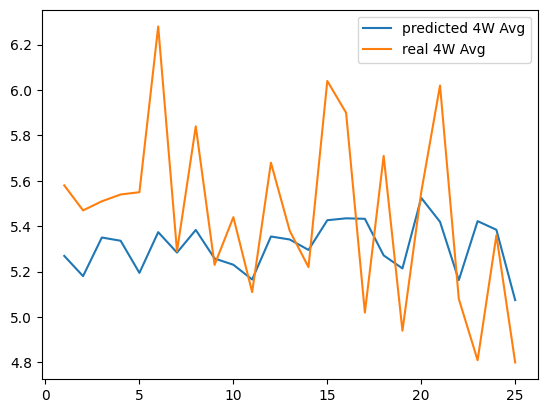

In [11]:
# 그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_4WAvg, label='predicted 4W Avg')
plt.plot(X_num, real_4WAvg, label='real 4W Avg')
plt.legend()
plt.show()